In [42]:
import cv2 as cv
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
import math

# Choose an example file (200dpi)
(Journal)

ce_001sg.bmp;4;748;1882;TXT

ce_001sg.bmp;4;1427;2059;TXT

ce_001sg.bmp;5;1468;142;TXT

ce_001sg.bmp;5;1551;389;TXT


ce_001z4 file contents: 

�Ե�ԡ�����С��
�͢ͺ��Фس��ŹԸԪ�¾Ѳ�ҷ�������ʹѺʹع��������
���͢�����  �͢ͺ�س�ͧ�ع��������������͹��ѡ���ѧ�ҹ  ��ǹ�Ҫ

In [38]:
img_path = "/scratch/lt2326-2926-h24/ThaiOCR/ThaiOCR-TestSet/Journal/Image/200dpi_BW/ce_001sb.bmp"
img = Image.open(img_path)

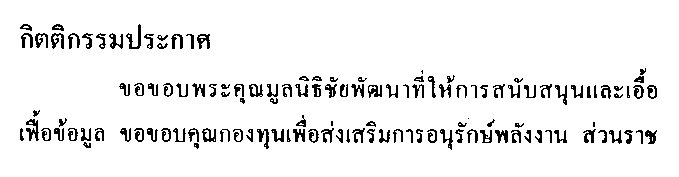

In [39]:
z4 = img.crop((748, 1882, 1427, 2059))
z4

In [ ]:
contours, _ = cv.findContours(np.array(z4), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

In [47]:
bounding_boxes = [] 

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    if w > 5 and h > 10:
        bounding_boxes.append((x, y-20, x+w, y+h+20))

# Sort by Euclidian distance
# This doesn't work very well so need to find a better method
# Maybe split text into rows then segment out
sorted_boxes = sorted(bounding_boxes,key=lambda pt:math.sqrt(pt[0]**2+pt[1]**2))

for (x, y, x2, y2) in sorted_boxes:
    display(z4.crop((x, y, x2, y2)))

# Second example file, higher DPI

ce_001tg.bmp;2;397;212;TXT

ce_001tg.bmp;2;1385;2690;TXT


5.  �ŷ��Ҵ��Ҩ����Ѻ
���ͧ�ҡ��鹷����Թ����ç�����ǹ�˭�����  �ٹ���֡�ҡ��
�Ѳ���ѹ���ͧ�Ҩҡ����Ҫ����  ��觷ء� �� ������ٹ��� �ջ�ЪҪ�
�ɵá�  �ѡ�Ԩ��  �ѡ��áԨ  �ѡ�ص��ˡ���  �ѡ���¹  ���Ե  �ѡ�֡��
���  ������������ٹ���  �����������蹤�  ��觶������繾ԾԸ�ѳ������

(Which seems way too short for the given image...)

In [ ]:
img_path = "/scratch/lt2326-2926-h24/ThaiOCR/ThaiOCR-TestSet/Journal/Image/300dpi_BW/ce_001tb.bmp"
img = Image.open(img_path)

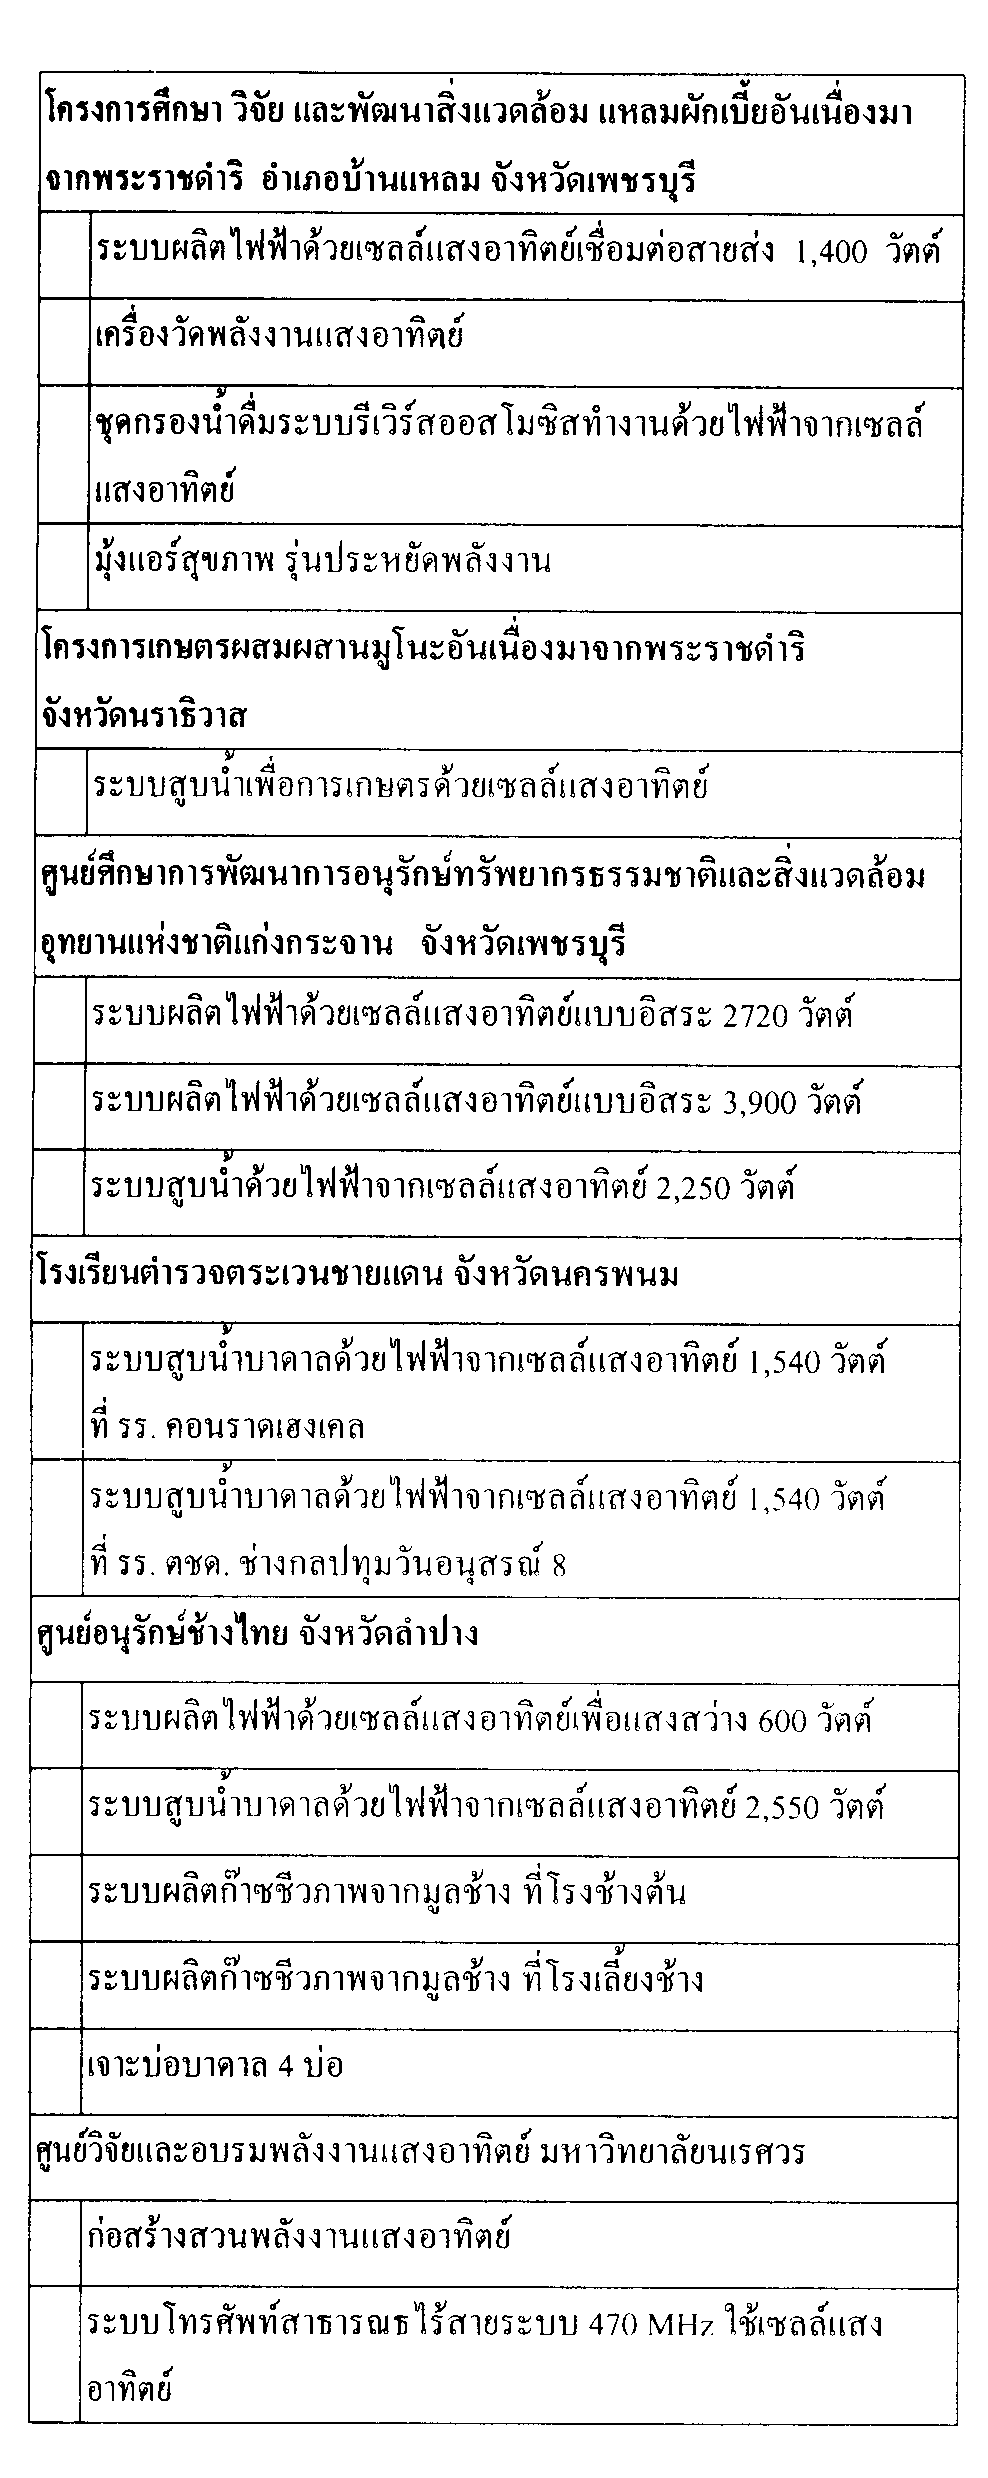

In [36]:
z2 = img.crop((397, 212, 1385, 2690))
z2

In [ ]:
contours, _ = cv.findContours(np.array(z2), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

In [35]:
for cnt in contours[:10]:
    x, y, w, h = cv.boundingRect(cnt)
    if w > 5 and h > 10:
        print(x, y, w, h)
        crop = z4.crop((x, y, x + w, y + h))
        display(crop)

645 130 12 14


636 130 7 14


624 130 9 14
